In [159]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy

In [160]:
CWD = os.getcwd()

In [161]:
aapl_csv_path = os.path.join(CWD, 'AAPL.csv')
df = pd.read_csv(aapl_csv_path)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


# Using past 60 days of data to predict next day's data
> Date will be dropped for now since putting the days in sequence likely captures the 'Date' information

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Assuming you already have your data loaded in 'df' (with columns: 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume')
# df = pd.read_csv('your_data.csv')

# Step 1: Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values)

# Step 2: Create sequences for LSTM input (e.g., use 60 previous days to predict the next day's values)
def create_sequences(data, seq_length=60):
    x_data = []
    y_data = []
    
    for i in range(seq_length, len(data)):
        x_data.append(data[i-seq_length:i])
        y_data.append(data[i])
        
    return np.array(x_data), np.array(y_data)

# Create sequences
X, y = create_sequences(scaled_data, seq_length=60)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=6))

# Step 5: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 7: Predict the next day's values for a specific test point
# Select a random index from the test set (you can choose any index here)
index = 100  # You can select any index in the test set
test_input = X_test[index].reshape(1, X_test.shape[1], X_test.shape[2])

# Predict the values for the next day
predicted_values = model.predict(test_input)

# Inverse transform the prediction and the actual value
predicted_values = scaler.inverse_transform(predicted_values)
actual_values = scaler.inverse_transform(y_test[index].reshape(1, -1))

# Step 8: Print the actual and predicted values
print("Predicted Values (Next Day):")
print(f"Open: {predicted_values[0][0]}")
print(f"High: {predicted_values[0][1]}")
print(f"Low: {predicted_values[0][2]}")
print(f"Close: {predicted_values[0][3]}")
print(f"Adj Close: {predicted_values[0][4]}")
print(f"Volume: {predicted_values[0][5]}")

print("\nActual Values (Next Day):")
print(f"Open: {actual_values[0][0]}")
print(f"High: {actual_values[0][1]}")
print(f"Low: {actual_values[0][2]}")
print(f"Close: {actual_values[0][3]}")
print(f"Adj Close: {actual_values[0][4]}")
print(f"Volume: {actual_values[0][5]}")


Epoch 1/10


c:\Users\yanka\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 6.1460e-04
Epoch 2/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 1.6221e-04
Epoch 3/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 1.6027e-04
Epoch 4/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 1.4605e-04
Epoch 5/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 1.6204e-04
Epoch 6/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 1.3545e-04
Epoch 7/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 1.5876e-04
Epoch 8/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 1.2949e-04
Epoch 9/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 1.4931e-04
Epoch 10/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 1.3676e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Predicted Values (Next Day):
Open: 89.23247528076172
High: 89.68207550048828
Low: 87.51905822753906
Close: 88.84752655029297
Adj Close: 77.25399017333984
Volume: 150438208.0

Actual Values (Next Day):
Open: 88.77714538574219
High: 89.50714111328125
L

# Predict whether next day's high would be higher than open

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Assuming you already have your data loaded in 'df' (with columns: 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume')
# df = pd.read_csv('your_data.csv')

# Step 1: Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values)

# Step 2: Create sequences for LSTM input (e.g., use 60 previous days to predict the next day's values)
def create_sequences(data, seq_length=60):
    x_data = []
    y_data = []
    
    for i in range(seq_length, len(data)):
        x_data.append(data[i-seq_length:i])
        
        # Target: 1 if High > Open for the next day, else 0
        if data[i][1] > data[i][0]:  # High is at index 1 and Open is at index 0
            y_data.append(1)
        else:
            y_data.append(0)
        
    return np.array(x_data), np.array(y_data)

# Create sequences
X, y = create_sequences(scaled_data, seq_length=60)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification output

# Step 5: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 7: Predict the result for a specific test point
index = 100  # You can select any index in the test set
test_input = X_test[index].reshape(1, X_test.shape[1], X_test.shape[2])

# Predict whether the High will be greater than the Open (1 or 0)
predicted_class = model.predict(test_input)

# Convert prediction to binary outcome
predicted_class = (predicted_class > 0.5).astype(int)

# Step 8: Print the actual and predicted values
actual_class = y_test[index]

print(f"Prediction for the test point (High > Open): {'Yes' if predicted_class == 1 else 'No'}")
print(f"Actual result for the test point (High > Open): {'Yes' if actual_class == 1 else 'No'}")


Epoch 1/10


c:\Users\yanka\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6342 - loss: 0.6592
Epoch 2/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6503 - loss: 0.6462
Epoch 3/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6547 - loss: 0.6431
Epoch 4/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6506 - loss: 0.6470
Epoch 5/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6455 - loss: 0.6491
Epoch 6/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6566 - loss: 0.6412
Epoch 7/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6499 - loss: 0.6470
Epoch 8/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6600 - loss: 0.6409
Epoch 9/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.6467 - loss: 0.6470
Epoch 10/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.6517 - loss: 0.6447
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
Prediction for the test point (High > Open): No
Actual result for the test point (High > Open): No


In [21]:
false_predictions = []
num_test = 100

for index in range(num_test):
    # Step 7: Predict the result for a specific test point
    test_input = X_test[index].reshape(1, X_test.shape[1], X_test.shape[2])

    # Predict whether the High will be greater than the Open (1 or 0)
    predicted_class = model.predict(test_input, verbose=0)

    # Convert prediction to binary outcome
    predicted_class = (predicted_class > 0.5).astype(int)

    # Step 8: Print the actual and predicted values
    actual_class = y_test[index]

    if predicted_class != actual_class:
        false_predictions.append(index)

    # print(f"Prediction for the test point (High > Open): {'Yes' if predicted_class == 1 else 'No'}")
    # print(f"Actual result for the test point (High > Open): {'Yes' if actual_class == 1 else 'No'}")

print(f'False Predictions:{len(false_predictions)}/{num_test}')

False Predictions:31/100


# Predict High, Low
> (can ignore this, some error with dataset, likely coz of scaling)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Assuming you already have your data loaded in 'df' (with columns: 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume')
# df = pd.read_csv('your_data.csv')

# Step 1: Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values)

# Step 2: Create sequences for LSTM input (e.g., use 60 previous days to predict the next day's High and Low)
def create_sequences(data, seq_length=60):
    x_data = []
    y_data = []
    
    for i in range(seq_length, len(data)):
        x_data.append(data[i-seq_length:i])
        # Target: We predict the next day's High and Low
        y_data.append([data[i][1], data[i][2]])  # High is at index 1 and Low is at index 2
        
    return np.array(x_data), np.array(y_data)

# Create sequences
X, y = create_sequences(scaled_data, seq_length=60)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=2))  # Output layer with 2 units for High and Low

# Step 5: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 7: Predict the High and Low values for a specific test point
index = 100  # You can select any index in the test set
test_input = X_test[index].reshape(1, X_test.shape[1], X_test.shape[2])

# Predict the next day's High and Low values
predicted_values = model.predict(test_input)

# Inverse transform the prediction and the actual values
predicted_values = scaler.inverse_transform(np.hstack((np.zeros((predicted_values.shape[0], 4)), predicted_values)))[:, 4:]  # Get only High and Low
actual_values = scaler.inverse_transform(np.hstack((np.zeros((y_test[index].reshape(1, -1).shape[0], 4)), y_test[index].reshape(1, -1))))[:, 4:]

# Step 8: Print the actual and predicted values
print(f"Predicted High: {predicted_values[0][0]}")
print(f"Predicted Low: {predicted_values[0][1]}")

print(f"Actual High: {actual_values[0][0]}")
print(f"Actual Low: {actual_values[0][1]}")


Epoch 1/10


c:\Users\yanka\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 1.8366e-04
Epoch 2/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 4.4640e-06
Epoch 3/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 4.2704e-06
Epoch 4/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 4.3554e-06
Epoch 5/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 4.5171e-06
Epoch 6/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 3.0907e-06
Epoch 7/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 3.3790e-06
Epoch 8/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 3.4899e-06
Epoch 9/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 2.3837e-06
Epoch 10/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 2.5640e-06
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Predicted High: 91.08810595068343
Predicted Low: 507663357.3704183
Actual High: 89.2986754069105
Actual Low: 499987975.81432194


# Predict High, Low
> Using predictions, if actual open is within predicted high and low, take it as buy the stock. 
> Sell it if actual low is lower than predicted low because you would sell it at predicted low for a loss. Else, sell it if actual high is higher than predicted high for a profit.
> Else sell it at actual close for a net gain/loss
> Honestly a shit algorithm coz it doesnt predict whether it will go up or down first. But somehow it works. I think about this more tmr :)

In [36]:
# Calculate the index to split the data (80% training, 20% testing)
split_index = int(len(df) * 0.8)

# Training data (first 80% of the data)
train_data = df[:split_index]

# Test data (last 20% of the data)
test_data = df[split_index:]

# Step 1: Prepare the data (Do not scale, use raw data)
# Use 'Open', 'High', 'Low', 'Close', 'Adj Close' as input features for both training and testing sets
train_data = train_data[['Open', 'High', 'Low', 'Close', 'Adj Close']].values
test_data = test_data[['Open', 'High', 'Low', 'Close', 'Adj Close']].values

# Step 2: Create sequences for LSTM input (e.g., use 60 previous days to predict the next day's High and Low)
def create_sequences(data, seq_length=30):
    x_data = []
    y_data = []
    
    for i in range(seq_length, len(data)):
        x_data.append(data[i-seq_length:i])
        # Target: We predict the next day's High and Low
        y_data.append([data[i][1], data[i][2]])  # High is at index 1 and Low is at index 2
        
    return np.array(x_data), np.array(y_data)

# Create sequences for training and testing
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

# Step 3: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=2))  # Output layer with 2 units for High and Low

# Step 4: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Step 6: Make predictions on the test set
predicted_values = model.predict(X_test)

# Step 7: Simulate trading based on the predictions
total_profit = 0
losses = []
gains = []
closes = []
total = []

for i in range(len(predicted_values)):
    actual_open = test_data[i + 30][0]  # Open value of the current day (start of the next day for prediction)
    predicted_high = predicted_values[i][0]
    predicted_low = predicted_values[i][1]
    actual_low = test_data[i + 30][2]
    actual_high = test_data[i + 30][1]
    actual_close = test_data[i + 30][3]
    
    # Case 1: If Open is within the predicted High and Low, we "buy"
    if predicted_low <= actual_open <= predicted_high:
        # Buy condition: Take the difference between actual open and predicted low (loss) or predicted high (gain)
        
        # If the actual low is lower than predicted low, loss is the difference between Open and predicted low
        if actual_low < predicted_low:
            loss = predicted_low - actual_open
            total_profit += loss
            losses.append(loss)
        
        # If predicted high is higher than actual high, gain is the difference between predicted high and Open
        elif predicted_high > actual_high:
            abs_gain = predicted_high - actual_open
            total_profit += abs_gain
            gains.append(abs_gain)
        
        # If no gain or loss, sell at Close (gain or loss is the difference between Open and Close)
        else:
            net = actual_close - actual_open
            total_profit += net
            closes.append(net)

    total.append(total_profit)
    
    # Print the profit/loss for each prediction if you want to track it
    print(f"Prediction {i + 1}:")
    print(f"Predicted High: {predicted_high}, Predicted Low: {predicted_low}")
    print(f"Actual High: {actual_high}, Actual Low: {actual_low}, Actual Close: {actual_close}")
    print(f"Total Profit/Loss so far: {total_profit}\n")

# Final profit or loss
print(f"Total Profit/Loss after testing: {total_profit}")


Epoch 1/100


c:\Users\yanka\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 199.4839
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 105.2027
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 69.5263
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 53.1126
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 35.7974
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 25.9706
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 22.3674
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 13.7337
Epoch 9/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 11.6571
Epoch 10/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 11.3776
Epoch 11/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 10.0814
Epoch 12/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 10.0463
Epoch 13/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 9.6067
Epoch 14/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 6.7217
Epoch 15/100
247/247 ━━━━━━━━━━━━━━━

In [59]:
### For closes, find number of closes that result in profit/loss
count_above_zero = sum(1 for x in closes if x > 0)
count_below_zero = len(closes) - count_above_zero

total_days_traded = sum([len(gains), len(losses), len(closes)])
print(f'Days traded: {total_days_traded}')
print(f'Days trade not taken due to actual open being outside of predicted range: {len(predicted_values)-total_days_traded}')
print()

print(f'Days of gains: {len(gains)} + {count_above_zero}(From closing) = {len(gains)+count_above_zero}')
print(f'Days of losses: {len(losses)} + {count_below_zero}(From closing) = {len(losses)+count_below_zero}')
print()

print(f'Total profit from gains = {sum(gains)}')
print(f'Total profit from losses = {sum(losses)}')
print(f'Total net change from closes = {sum(closes)}')
print()

print(f'Grand Total: {total_profit}')

Days traded: 258
Days trade not taken due to actual open being outside of predicted range: 1694

Days of gains: 47 + 68(From closing) = 115
Days of losses: 130 + 13(From closing) = 143

Total profit from gains = 36.15910720825196
Total profit from losses = -48.5892105102539
Total net change from closes = 55.081455230712876

Grand Total: 42.65135192871094


# Predict Next day's Open and Close

In [ ]:
# Calculate the index to split the data (80% training, 20% testing)
split_index = int(len(df) * 0.8)

# Training data (first 80% of the data)
train_data = df[:split_index]

# Test data (last 20% of the data)
test_data = df[split_index:]

# Step 1: Prepare the data (Do not scale, use raw data)
# Use 'Open', 'High', 'Low', 'Close', 'Adj Close' as input features for both training and testing sets
train_data = train_data[['Open', 'High', 'Low', 'Close', 'Adj Close']].values
test_data = test_data[['Open', 'High', 'Low', 'Close', 'Adj Close']].values

# Step 2: Create sequences for LSTM input (e.g., use 30 previous days to predict the next day's High and Low)
def create_sequences(data, seq_length=30):
    x_data = []
    y_data = []
    
    for i in range(seq_length, len(data)):
        x_data.append(data[i-seq_length:i])
        # Target: We predict the next day's High and Low
        y_data.append([data[i][0], data[i][3]])  # Open is at index 0
        
    return np.array(x_data), np.array(y_data)

# Create sequences for training and testing
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

# Step 3: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=2))  # Output layer with 2 units for Open and Close

# Step 4: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, shuffle=True)



Epoch 1/100


c:\Users\yanka\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 190.1912
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 103.0556
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 69.8543
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 47.2452
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 32.5017
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 24.4700
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 19.9322
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 15.5462
Epoch 9/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 13.5509
Epoch 10/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 10.3738
Epoch 11/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.8228
Epoch 12/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.8900
Epoch 13/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.2651
Epoch 14/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.2950
Epoch 15/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1

IndexError: index 30 is out of bounds for axis 0 with size 5

In [231]:
predicted_values

array([[83.248276, 83.17167 ],
       [82.37019 , 82.31821 ],
       [84.27112 , 84.16915 ],
       ...,
       [88.69278 , 88.00587 ],
       [88.69279 , 88.005875],
       [88.692795, 88.00588 ]], dtype=float32)

In [208]:
# Step 6: Make predictions on the test set
predicted_values = model.predict(X_test)

# Step 7: Simulate trading based on the predictions
capital = 10000
num_shares = 0
losses = []
gains = []
closes = []
total = []

for i in range(len(predicted_values)):
    current_close = test_data[i+29][3]
    actual_open = test_data[i + 30][0]  # Open value of the current day (start of the next day for prediction)
    predicted_open = predicted_values[i][0]
    predicted_close = predicted_values[i][1]
    actual_low = test_data[i + 30][2]
    actual_high = test_data[i + 30][1]
    actual_close = test_data[i + 30][3]
    
    # Case 1: If Open is within the predicted High and Low, we "buy"
    if current_close > predicted_open:
        if num_shares > 0:
            capital += num_shares*current_close
            num_shares = 0
    else:
        shares_bought = capital//current_close
        num_shares += shares_bought
        capital -= shares_bought*current_close

    if predicted_close < actual_open:
        if num_shares > 0:
            capital += num_shares*actual_open
            num_shares = 0
    else:
        shares_bought = capital//actual_open
        num_shares += shares_bought
        capital -= shares_bought*actual_open

    total.append(capital)
    
    # # Print the profit/loss for each prediction if you want to track it
    # print(f"Prediction {i + 1}:")
    # print(f"Predicted Open: {predicted_open}, Predicted Close: {predicted_close}")
    # print(f"Actual Open: {actual_open}, Actual Close: {actual_close}")
    # # print(f"Total Profit/Loss so far: {total_profit}\n")

# Final profit or loss
print(f"Final Capital: {capital + num_shares*actual_close}")

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Final Capital: 10668.531936645508


In [202]:
# Step 7: Simulate trading based on the predictions
capital = 10000
num_shares = 0
losses = []
gains = []
closes = []
total = []

for i in range(len(predicted_values)):
    current_close = test_data[i+29][3]
    actual_open = test_data[i + 30][0]  # Open value of the current day (start of the next day for prediction)
    predicted_open = predicted_values[i][0]
    predicted_close = predicted_values[i][1]
    actual_low = test_data[i + 30][2]
    actual_high = test_data[i + 30][1]
    actual_close = test_data[i + 30][3]
    
    if current_close > predicted_open:
        if num_shares > 0:
            capital += num_shares*current_close
            num_shares = 0
    else:
        shares_bought = capital//current_close
        num_shares += shares_bought
        capital -= shares_bought*current_close

    if predicted_close < actual_open:
        if num_shares > 0:
            capital += num_shares*actual_open
            num_shares = 0
    else:
        shares_bought = capital//actual_open
        num_shares += shares_bought
        capital -= shares_bought*actual_open

    total.append(capital)

print(f"Final Capital: {capital + num_shares*actual_close}")

Final Capital: 10228.201988220218


# Benchmarking (Buy and Hold)

In [10]:
# Calculate the index to split the data (80% training, 20% testing)
split_index = int(len(df) * 0.8)

# Training data (first 80% of the data)
train_data = df[:split_index]

# Test data (last 20% of the data)
test_data = df[split_index:]
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
7927,2012-05-16,79.150002,79.555717,77.291428,78.011429,67.717102,140224000
7928,2012-05-17,77.901428,78.214287,75.731430,75.731430,65.737991,179305000
7929,2012-05-18,76.279999,77.629997,74.597145,75.768570,65.770210,183073100
7930,2012-05-21,76.357140,80.220001,76.292854,80.182854,69.601997,157776500
7931,2012-05-22,81.364288,81.982857,78.940002,79.567146,69.067520,173717600
...,...,...,...,...,...,...,...
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500


In [33]:
capital = 10000
num_shares = capital//test_data.iloc[0]['Open']
buy_and_hold = num_shares * (test_data.iloc[-1]['Close'] - test_data.iloc[0]['Open'])
print(f"Buy and Hold Benchmark Profit: {buy_and_hold/capital*100:.2f}% gain")

Buy and Hold Benchmark Profit: 203.82% gain


# Benchmarking (EMA)

Final Portfolio Value: $14122.46


C:\Users\yanka\AppData\Local\Temp\ipykernel_51704\1254628510.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Portfolio Value'] = portfolio_value
c:\Users\yanka\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


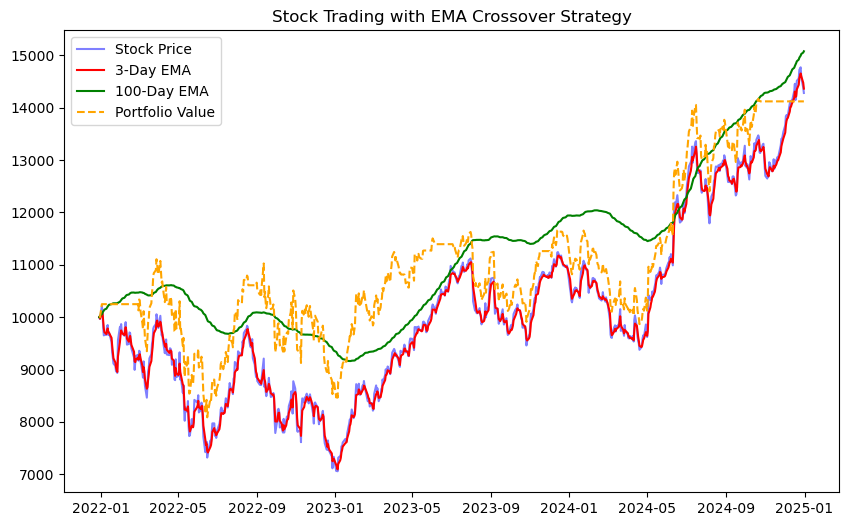

In [134]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Compute EMAs
short_window = 3
long_window = 100

df['EMA_SHORT'] = df['Close']['AAPL'].ewm(span=short_window, adjust=False).mean()
df['EMA_LONG'] = df['Close']['AAPL'].ewm(span=long_window, adjust=False).mean()

# Step 2: Generate Buy/Sell signals
df['Signal'] = 0  # Default to 0 (no action)

# Compare EMA12 and EMA26 directly using column indexing (avoiding iloc)
df['Signal'] = np.where(df['EMA_SHORT'] > df['EMA_LONG'], 1, 0)

df['Position'] = df['Signal'].diff()  # To get when the signal changes (crossovers)

# Calculate the index to split the data (80% training, 20% testing)
split_index = int(len(df) * 0.8)

# Training data (first 80% of the data)
train_data = df[:split_index]

# Test data (last 20% of the data)
test_data = df[split_index:]

# Step 3: Simulate Trading
initial_capital = 10000  # Starting capital in dollars
cash = initial_capital
shares = 0
portfolio_value = []

for i in range(0, len(test_data)):
    if df['Position'][i] == 1:  # Buy Signal
        shares = cash // test_data['Close'].iloc[i]  # Buy as many shares as possible
        cash -= shares * test_data['Close'].iloc[i]  # Deduct the cost from cash
    elif df['Position'][i] == -1:  # Sell Signal
        cash += shares * test_data['Close'].iloc[i]  # Sell the shares
        shares = 0  # No shares left

    # Track portfolio value at each step (cash + value of shares held)
    portfolio_value.append(cash + shares * test_data['Close'].iloc[i])

# Step 4: Calculate Total Portfolio Value
final_portfolio_value = cash + shares * test_data['Close'].iloc[-1]
print(f"Final Portfolio Value: ${final_portfolio_value.values[0]:.2f}")

# Step 5: Plot Results
test_data['Portfolio Value'] = portfolio_value

plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['Close']*(initial_capital/test_data['Close'].iloc[0]), label='Stock Price', color='blue', alpha=0.5)
plt.plot(test_data.index, test_data['EMA_SHORT']*(initial_capital/test_data['EMA_SHORT'].iloc[0]), label=F'{short_window}-Day EMA', color='red')
plt.plot(test_data.index, test_data['EMA_LONG']*(initial_capital/test_data['EMA_LONG'].iloc[0]), label=F'{long_window}-Day EMA', color='green')
plt.plot(test_data.index, test_data['Portfolio Value'], label='Portfolio Value', color='orange', linestyle='--')
plt.title('Stock Trading with EMA Crossover Strategy')
plt.legend(loc='best')
plt.show()


# Predict whether open is higher than close, then long/short the stock as predicted

In [16]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with columns ['Open', 'High', 'Low', 'Close', 'Adj Close']
# df = pd.read_csv('your_data.csv')

# Step 1: Prepare the data
# We use 'Open', 'High', 'Low', 'Close' to predict whether Open is higher than Close.
# We create a binary target where 1 indicates Open > Close, and 0 indicates Close > Open.
df['Target'] = (df['Open'] > df['Close']).astype(int)

# Select features and target
features = df[['Open', 'High', 'Low', 'Close']].values
target = df['Target'].values

# Step 2: Create sequences for LSTM input (e.g., use 60 previous days to predict next day's Open vs Close)
def create_sequences(features, target, seq_length=30):
    x_data = []
    y_data = []
    
    for i in range(seq_length, len(features)):
        x_data.append(features[i-seq_length:i])  # Use 60 previous days' data
        y_data.append(target[i])  # Target is 1 or 0, depending on whether Open > Close next day
        
    return np.array(x_data), np.array(y_data)

# Create sequences
X, y = create_sequences(features, target, seq_length=30)

# Step 3: Split the data into training and testing sets
split_index = int(len(df) * 0.8)  # 80% for training, 20% for testing
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 4: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))  # Output layer with 1 unit (binary classification)

# Step 5: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Step 7: Predict on the test set
predictions = model.predict(X_test)

# Step 8: Simulate trading based on the predictions
total_profit = 0

for i in range(len(predictions)):
    actual_open = df.iloc[split_index + i + 30]['Open']  # Open of the current day
    actual_close = df.iloc[split_index + i + 30]['Close']  # Close of the current day
    
    # If prediction > 0.5, model predicts Open > Close (sell at Open, buy at Close)
    if predictions[i] > 0.5:
        # Sell at Open and buy back at Close
        net_profit = actual_open - actual_close
    else:
        # Buy at Open and sell at Close
        net_profit = actual_close - actual_open
    
    total_profit += net_profit

    # Print the profit/loss for each prediction
    print(f"Prediction {i + 1}:")
    print(f"Predicted: {'Open > Close' if predictions[i] > 0.5 else 'Close > Open'}")
    print(f"Actual Open: {actual_open}, Actual Close: {actual_close}")
    print(f"Net Profit/Loss: {net_profit}")
    print(f"Total Profit/Loss so far: {total_profit}\n")

# Final profit or loss
print(f"Total Profit/Loss after testing: {total_profit}")


Epoch 1/20


c:\Users\yanka\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5222 - loss: 0.6951
Epoch 2/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5263 - loss: 0.6938
Epoch 3/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5237 - loss: 0.6940
Epoch 4/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5231 - loss: 0.6938
Epoch 5/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5196 - loss: 0.6929
Epoch 6/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5248 - loss: 0.6919
Epoch 7/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5269 - loss: 0.6926
Epoch 8/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5262 - loss: 0.6919
Epoch 9/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5292 - loss: 0.6912
Epoch 10/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5245 - loss: 0.6918
Epoch 11/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5198 - loss: 0.6925
Epoch 12/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy

In [18]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/09/05/28664524fcc67c078313d482bf25fe403e9399130622cfc89e185ec0abf6/yfinance-0.2.54-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.1/3.0 MB 1.9 MB/s eta 0:00:02
     -- ------------------------------------- 0.2/3.0 MB 2.1 MB/s eta 0:00:02
     --- ------------------------------------ 0.3/3.0 MB 2.1 MB/s eta 0:00:02
     ---- ----------------------------------- 0.4/3.0 MB 2

In [21]:
import yfinance as yf

# Fetch data for a stock (Apple, in this case) from 2010-01-01 to today
df = yf.download('AAPL', start='2010-01-01', end='2025-01-01')
print(df.head())


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440331  6.455077  6.391278  6.422877  493729600
2010-01-05  6.451467  6.487880  6.417461  6.458088  601904800
2010-01-06  6.348847  6.477046  6.342227  6.451467  552160000
2010-01-07  6.337110  6.379844  6.291067  6.372320  477131200
2010-01-08  6.379241  6.379843  6.291368  6.328683  447610800


In [26]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440331,6.455077,6.391278,6.422877,493729600
2010-01-05,6.451467,6.487880,6.417461,6.458088,601904800
2010-01-06,6.348847,6.477046,6.342227,6.451467,552160000
2010-01-07,6.337110,6.379844,6.291067,6.372320,477131200
2010-01-08,6.379241,6.379843,6.291368,6.328683,447610800
...,...,...,...,...,...
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100


In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset (assuming 'data.csv' contains stock price data with columns: Date, Open, High, Low, Close)
data = pd.read_csv('AAPL.csv')

# Preprocessing: Use Open, High, Low, and Close as features
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Select the relevant features (Open, High, Low, Close)
features = ['Open', 'High', 'Low', 'Close']
data = data[features]

# Prepare the data for LSTM (no scaling)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data.iloc[i:(i + time_step)].values)  # Use the last 'time_step' rows
        y.append(data.iloc[i + time_step]['Close'])  # Predict the 'Close' value at the next step
    return np.array(X), np.array(y)

time_step = 30  # Use the last 60 days' data to predict the next day's price
X, y = create_dataset(data, time_step)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Prediction output (next day's Close price)

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict the next 30 days (recursive prediction)
def predict_next_30_days(model, initial_input, n_days=30):
    predicted_prices = []
    
    # Initialize the sequence with the most recent data
    current_sequence = initial_input
    
    for _ in range(n_days):
        # Predict the next day's Close price
        next_day_price = model.predict(current_sequence.reshape(1, time_step, len(features)))
        
        # Append the prediction to the sequence and drop the first row
        predicted_prices.append(next_day_price[0][0])
        current_sequence = np.append(current_sequence[1:], [[next_day_price[0][0], next_day_price[0][0], next_day_price[0][0], next_day_price[0][0]]], axis=0)
        
    return predicted_prices

# Take the last part of the training data as the initial input for predictions
initial_input = X_test[0]  # Using the first sequence from the test set as the starting point

# Predict the next 30 days
predicted_prices_30_days = predict_next_30_days(model, initial_input, n_days=30)

# Visualize the predicted prices
plt.figure(figsize=(10, 6))

# Plot the actual prices from the test set (optional)
plt.plot(data.index[-30:], y_test[-30:], color='blue', label='Actual Prices')

# Plot the predicted prices for the next 30 days
forecast_dates = pd.date_range(data.index[-30:] + pd.Timedelta(days=1), periods=30, freq='D')
plt.plot(forecast_dates, predicted_prices_30_days, color='red', label='Predicted Prices (Next 30 Days)')

plt.title('Stock Price Prediction for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Epoch 1/10


c:\Users\yanka\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 47/247 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 237.7615

KeyboardInterrupt: 

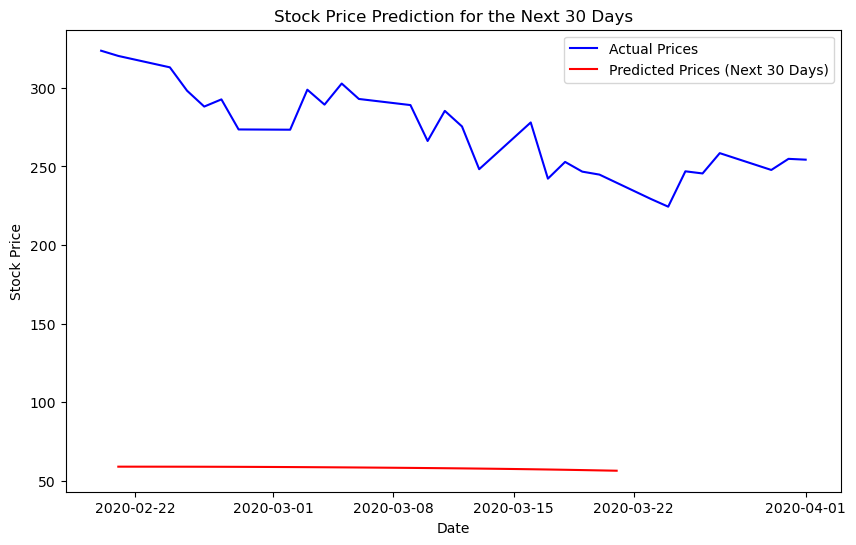

In [157]:
# Visualize the predicted prices
plt.figure(figsize=(10, 6))

# Plot the actual prices from the test set (optional)
plt.plot(data.index[-30:], y_test[-30:], color='blue', label='Actual Prices')

# Plot the predicted prices for the next 30 days
forecast_dates = pd.date_range(data.index[-30] + pd.Timedelta(days=1), periods=30, freq='D')
plt.plot(forecast_dates, predicted_prices_30_days, color='red', label='Predicted Prices (Next 30 Days)')

plt.title('Stock Price Prediction for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()